## visualize regressions

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm  # one way to do regs
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

y = diamonds2['lprice']
X = diamonds2[['const','lcarat']]

model1 = sm.OLS(y,X)                # pick model type and specify model features
results1 = model1.fit()             # estimate / fit
print(results1.summary())           # view results 
y_predicted1 = results1.predict()   # get the predicted results
residuals1 = results1.resid         # get the residuals

diamonds = sns.load_dataset('diamonds')
diamonds2 = (diamonds
             .query('carat<2.5')
             .assign(lprice=np.log(diamonds['price']))#create a new function
             .assign(lcarat=np.log(diamonds['carat']))
             .assign(ideal = diamonds['cut'] == 'Ideal')
             .assign(const = 1)
            )



                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.542e+05
Date:                Wed, 15 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:42:09   Log-Likelihood:                -4073.2
No. Observations:               53797   AIC:                             8150.
Df Residuals:                   53795   BIC:                             8168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4525      0.001   6193.432      0.0

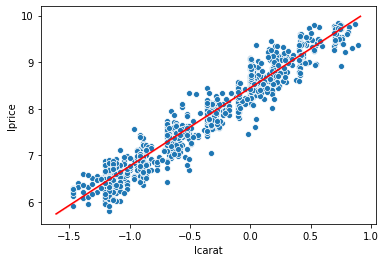

In [6]:
# let's plot our data with the OLS predicted fit
sns.scatterplot(x='lcarat',y='lprice',data=diamonds2.sample(1000)) # sampled just to avoid overplotting
sns.lineplot(x=diamonds2['lcarat'],y=y_predicted1,color='red')

# compare this to the built-in sns produces
plt.show()

Text(0.5, 1.0, 'Which is the same fit sns will give')

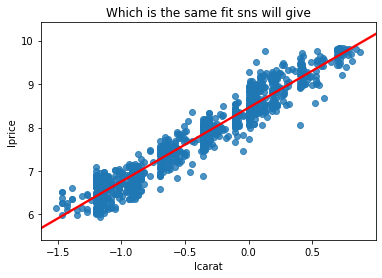

In [7]:
sns.regplot(x='lcarat',y='lprice',data=diamonds2.sample(1000),
            line_kws={'color':'red'}).set_title("Which is the same fit sns will give")

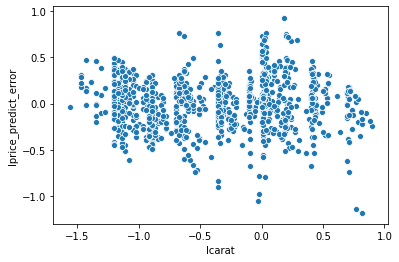

In [9]:
diamonds2['lprice_predict_error']=results1.resid # the residuals, the prediction error
sns.scatterplot(x='lcarat',y='lprice_predict_error',data=diamonds2.sample(1000))

In [10]:
diamonds2['lprice_predict'] = results1.predict() #note the parenthesis on this but not on .resid
diamonds2['price_predict'] = np.exp(diamonds2['lprice_predict'])
diamonds2.iloc[:,-7:].describe() #all the rows, but only for the last 5 columns
#regression errors are always avg = 0 (IF you include the constant)

,lprice,lcarat,const,lprice_predict_error,lprice_predict,price_predict
count,53797.000000,53797.000000,53797.0,5.379700e+04,53797.000000,53797.000000
mean,7.781923,-0.398700,1.0,-6.316737e-15,7.781923,3771.138812
std,1.011557,0.581060,0.0,2.610050e-01,0.977305,3700.038164
min,5.786897,-1.609438,1.0,-1.361775e+00,5.745541,312.792742
25%,6.854355,-0.916291,1.0,-1.700728e-01,6.911370,1003.621032
50%,7.781556,-0.356675,1.0,-6.028933e-03,7.852608,2572.433260
75%,8.573952,0.039221,1.0,1.659037e-01,8.518479,5006.430921
max,9.842835,0.912283,1.0,1.341449e+00,9.986913,21740.076097


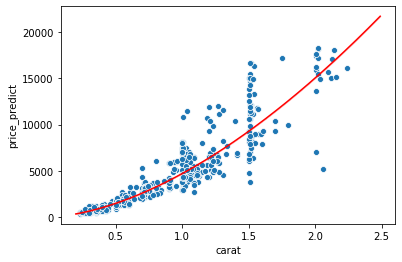

In [11]:
#this is L16 after class in discussion repo
g = sns.scatterplot(data=diamonds2.sample(500), y='price',x='carat')
sns.lineplot(data=diamonds2, y='price_predict', x='carat',color='red')
#.sample doesnt give the same dots every time... just a sample
#have to set a seed to get the same dots every time

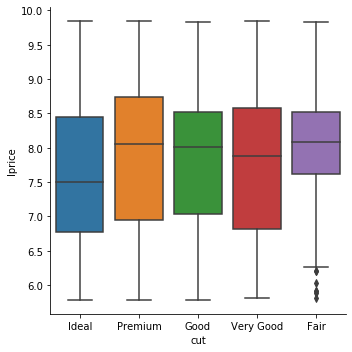

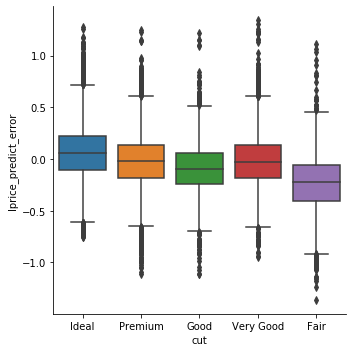

In [12]:
sns.catplot(data=diamonds2,y='lprice',x='cut',kind='box')

sns.catplot(data=diamonds2,y='lprice_predict_error',x='cut',kind='box')
#predict_error takes the carat into account & controls them
#now it is just the residuals... 
#after taking away the effect of carats!
#...cut is actually positively related to price!

## Regression Method 2:

In [13]:
#### let's work here
from statsmodels.formula.api import ols as sm_ols

sm_ols('lprice ~ lcarat + x',  # specify model (you don't need to include the constant!)
                  data=diamonds2).fit().summary()               # estimate / fit
            # view results ... identical to before

# the prediction and residual and plotting are the exact same

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 3.789e+05
Date:                Wed, 15 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:44:22   Log-Likelihood:                -3957.1
No. Observations:               53797   AIC:                             7920.
Df Residuals:                   53794   BIC:                             7947.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7340      0.047    164.086      0.000       7.642       7.826
lcarat         1.4719      0.014    105.852      0.000       1.445       1.499
x              0.1109      0.007     15.250      0.000       0.097       0.125
==============================================================================
Omnibus:                      861.522   Durbin-Watson:                   1.239
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1526.077
Skew:                           0.114   Prob(JB):                         0.00
Kurtosis:                       3.793   Cond. No.                         262.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

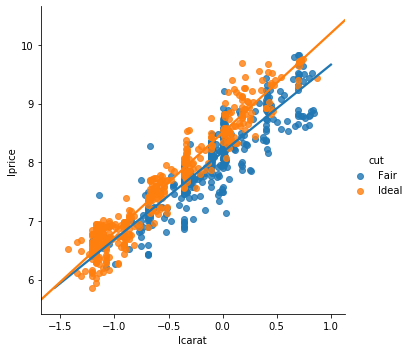

In [14]:
#exercise time.... 

#% increase in price for an ideal diamond compared to a non-ideal diamond
subsample_of_equal_amounts = diamonds2.query('cut in ["Ideal","Fair"]').groupby('cut').apply(lambda x: x.sample(400))
sns.lmplot(data=subsample_of_equal_amounts,
           y='lprice',x='lcarat',hue='cut',ci=None) 


In [15]:
diamonds2['ideal'].value_counts()

False    32273
True     21524
Name: ideal, dtype: int64